## **Environment setup**

In [1]:
import os
print(os.getcwd())
try:
    os.chdir('../../technical_interview_10QS')
except FileNotFoundError:
    print("""
        Posiblemente ya ejecutaste este bloque dos o más veces o tal vez el directorio está incorrecto. 
        ¿Ya ejecutaste este bloque antes y funcionó? Recuerda no ejecutarlo de nuevo. 
        ¿Estás en el directorio incorrecto? Puedes cambiarlo. 
        Recuerda el directorio donde estás:
        """)
print(os.getcwd())

c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src
c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS


In [2]:
from src.utils import contac_df, low_stock_products, high_priority_restocking, generate_recommendations

c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:49: SyntaxWarning: invalid escape sequence '\$'
  df['our_price'] = df['our_price'].replace({'\$': '', ',': ''}, regex=True).astype(float, errors='ignore')


## **Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## **EDA - Analysis**

### **Reading CSV**

In [4]:
df = contac_df()
df.head(-1)

c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current_stock'] = df['current_stock'].replace('out of stock', 0)


,product_name,our_price,category,current_stock,restock_threshold,date_to_restock,supplier
0,ORGANIC COFFEE BEANS (1LB),14.99,BEVERAGES,45,25,2023-12-01,BEAN BROTHERS
1,PREMIUM GREEN TEA (50 BAGS),8.99,BEVERAGES,32,20,2023-12-05,TEE TIME IMPORTS
2,MASALA CHAI MIX (12OZ),9.99,BEVERAGES,18,15,2023-12-10,SPICE WORLD
3,YERBA MATE LOOSE LEAF (1LB),12.99,BEVERAGES,5,10,2023-12-15,SWEET
4,HOT CHOCOLATE MIX (1LB),7.99,BEVERAGES,50,30,2023-12-20,SWEET
5,EARL GREY TEA (100 BAGS),11.99,BEVERAGES,28,25,2023-12-25,MR TEA
6,ESPRESSO BEANS (1LB),16.99,BEVERAGES,22,20,2023-12-30,BEAN BROTHERS
7,CHAMOMILE TEA (30 BAGS),6.99,TEA,12,15,2023-12-05,TEA TIME IMPORTS
8,MATCHA GREEN TEA POWDER (4OZ),19.99,BEVERAGES,8,999,2023-12-10,TEA TIME IMPORTS
9,DECAF COFFEE BEANS (1LB),15.99,BEVERAGES,15,15,2023-12-15,BEAN BROTHERS


### **Graphs**

#### **Boxplot for the outliers**

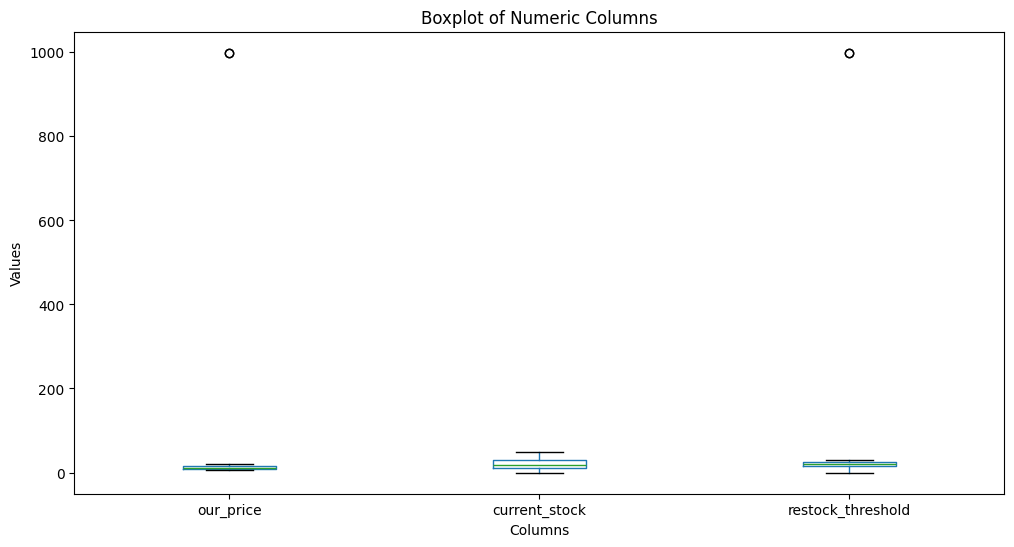

In [5]:
plt.figure(figsize=(12, 6))
df.boxplot(column=['our_price', 'current_stock', 'restock_threshold'], grid=False)
plt.title('Boxplot of Numeric Columns')
plt.suptitle('')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

We must remember that, when filling in null data, “999” was placed as missing data in these numerical columns. If we had a larger amount of data we could delete this data to see the possible input to an ML model.

The boxplot shows that most of the data in our columns are moving on a scale between 50 and 0.

#### **Rectify that the columns do not have data less than 0**

In [6]:
i = 0
for i in df['our_price']:
    if i < 0:
        print(i)

In [7]:
i = 0
for i in df['current_stock']:
    if i < 0:
        print(i)

In [8]:
i = 0
for i in df['restock_threshold']:
    if i < 0:
        print(i)

No presence of negative data that could violate the system

#### **Pie Chart - Which category has the most products?**

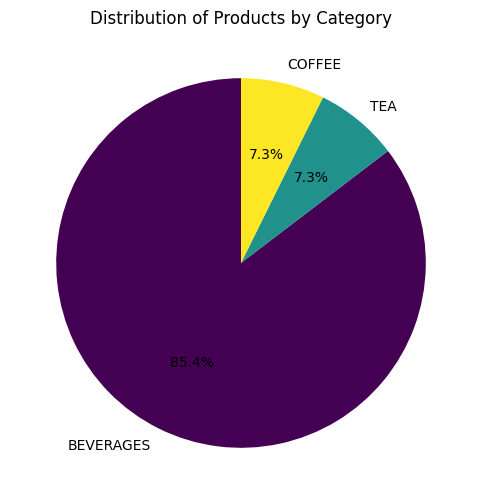

In [9]:
# Contar la cantidad de productos por categoría
category_counts = df['category'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Products by Category')
plt.ylabel('')
plt.show()

The most popular product category is Beverages.

## **Alerts systems**

In [10]:
low_stock_products(5)

c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current_stock'] = df['current_stock'].replace('out of stock', 0)


,product_name,our_price,category,current_stock,restock_threshold,date_to_restock,supplier
3,YERBA MATE LOOSE LEAF (1LB),12.99,BEVERAGES,5,10,2023-12-15,SWEET
10,MINT TEA (25 BAGS),7.49,BEVERAGES,0,12,2023-12-20,TEA TIME IMPORTS
17,YERBA MATE LOOSE LEAF (1LB),12.99,BEVERAGES,5,10,2022-11-01,SWEET
24,MINT TEA (25 BAGS),7.49,BEVERAGES,0,12,2022-10-30,TEA TIME IMPORTS
3,"""YERBA MATE LOOSE LEAF (1LB)""",12.99,BEVERAGES,5,10,2024-11-01,SWEET
10,"""MINT TEA (25 BAGS)""",7.49,BEVERAGES,0,12,2024-10-30,TEA TIME IMPORTS


In [11]:
high_priority_restocking()

c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current_stock'] = df['current_stock'].replace('out of stock', 0)


,product_name,our_price,category,current_stock,restock_threshold,date_to_restock,supplier
3,YERBA MATE LOOSE LEAF (1LB),12.99,BEVERAGES,5,10,2023-12-15,SWEET
7,CHAMOMILE TEA (30 BAGS),6.99,TEA,12,15,2023-12-05,TEA TIME IMPORTS
8,MATCHA GREEN TEA POWDER (4OZ),19.99,BEVERAGES,8,999,2023-12-10,TEA TIME IMPORTS
9,DECAF COFFEE BEANS (1LB),15.99,BEVERAGES,15,15,2023-12-15,BEAN BROTHERS
10,MINT TEA (25 BAGS),7.49,BEVERAGES,0,12,2023-12-20,TEA TIME IMPORTS
17,YERBA MATE LOOSE LEAF (1LB),12.99,BEVERAGES,5,10,2022-11-01,SWEET
21,CHAMOMILE TEA (30 BAGS),6.99,TEA,12,15,2022-11-05,TEA TIME IMPORTS
22,MATCHA GREEN TEA POWDER (4OZ),19.99,BEVERAGES,8,999,2022-11-17,TEA TIME IMPORTS
23,DECAF COFFEE BEANS (1LB),15.99,BEVERAGES,15,15,2022-11-13,BEAN BROTHERS
24,MINT TEA (25 BAGS),7.49,BEVERAGES,0,12,2022-10-30,TEA TIME IMPORTS


In [12]:
generate_recommendations()

c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current_stock'] = df['current_stock'].replace('out of stock', 0)
c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current_stock'] = df['current_stock'].replace('out of stock', 0)
c:\Users\LENOVO\Documents\GitHub\technical_interview_10QS\src\utils.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

{'price_outliers':              product_name  our_price   category  current_stock  \
 12  ROOIBOS TEA (40 BAGS)      999.0  BEVERAGES             30   
 26  ROOIBOS TEA (40 BAGS)      999.0  BEVERAGES             30   
 
     restock_threshold date_to_restock          supplier  
 12                 20      2023-12-30  TEA TIME IMPORTS  
 26                 20      2022-11-08  TEA TIME IMPORTS  ,
 'low_stock_products':                         product_name  our_price   category  current_stock  \
 3        YERBA MATE LOOSE LEAF (1LB)      12.99  BEVERAGES              5   
 8      MATCHA GREEN TEA POWDER (4OZ)      19.99  BEVERAGES              8   
 10                MINT TEA (25 BAGS)       7.49  BEVERAGES              0   
 17       YERBA MATE LOOSE LEAF (1LB)      12.99  BEVERAGES              5   
 22     MATCHA GREEN TEA POWDER (4OZ)      19.99  BEVERAGES              8   
 24                MINT TEA (25 BAGS)       7.49  BEVERAGES              0   
 3      "YERBA MATE LOOSE LEAF (1

This function is designed to analyze a dataset of products and generate actionable recommendations based on three key factors: price outliers, low stock products, and high-priority restocking items. Below is a detailed breakdown:

Function Overview
Purpose:

The function generates a dictionary of recommendations derived from product data. These recommendations help identify anomalies or trends in pricing, stock shortages, and restocking priorities.
Returns:

A dictionary containing three keys:
"price_outliers": Identifies products whose prices significantly deviate from the rest.
"low_stock_products": Highlights products with stocks below a critical threshold.
"high_priority_restocking": Suggests products that require urgent restocking based on demand and inventory thresholds.

NOTE: The thresholds need to be edited from utils.py if you want to access other types of recommendations with the thresholds you require.